In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cancer_data = load_breast_cancer()

X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = pd.DataFrame(cancer_data.target, columns=['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
y_train  = y_train.values.ravel()

rf_model = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)
rf_model.fit(X_train, y_train)

predictions = rf_model.predict(X_test)
score = rf_model.score(X_test, y_test)

In [3]:
predictions, score

(array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 0]),
 0.9649122807017544)

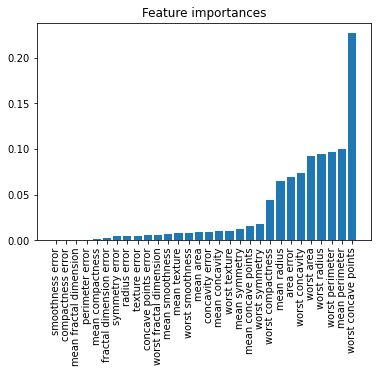

In [4]:
importances = rf_model.feature_importances_
indices_sorted = np.argsort(importances)

plt.figure()
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()

In [6]:
importances, indices_sorted

(array([0.06538411, 0.00748951, 0.10016571, 0.00922845, 0.00659614,
        0.00164077, 0.01001163, 0.01595059, 0.01219531, 0.        ,
        0.00487177, 0.00492563, 0.00047481, 0.06981265, 0.        ,
        0.        , 0.00928549, 0.00529973, 0.00421087, 0.00206701,
        0.09401215, 0.01052422, 0.0971349 , 0.09276246, 0.00804369,
        0.0436736 , 0.07358427, 0.22720779, 0.01774898, 0.00569776]),
 array([14, 15,  9, 12,  5, 19, 18, 10, 11, 17, 29,  4,  1, 24,  3, 16,  6,
        21,  8,  7, 28, 25,  0, 13, 26, 23, 20, 22,  2, 27], dtype=int64))

In [7]:
importances[indices_sorted]

array([0.        , 0.        , 0.        , 0.00047481, 0.00164077,
       0.00206701, 0.00421087, 0.00487177, 0.00492563, 0.00529973,
       0.00569776, 0.00659614, 0.00748951, 0.00804369, 0.00922845,
       0.00928549, 0.01001163, 0.01052422, 0.01219531, 0.01595059,
       0.01774898, 0.0436736 , 0.06538411, 0.06981265, 0.07358427,
       0.09276246, 0.09401215, 0.0971349 , 0.10016571, 0.22720779])